<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr2_VisualizacionDatos_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install matplotlib

In [3]:
pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size
import statsmodels.api as sm
import seaborn as sns
import statsmodels.tsa.seasonal as seasonal_decompose
import plotly.express as px

In [34]:
# Lectura de la base de datos
filename = 'volume_us_forecast_sample.csv'
data = pd.read_csv(filename, sep = ',')


# Eliminar la columnas que no sirven para el ejercicio
data = data.drop(['COUNTRY', 'GEOGRAPHY', 'SCENARIO_LVL_2', 'MODEL_CAT', 'UNIT', 'AMOUNT_WITHOUT_OUTLIERS', 'DEFAULT_MODEL'], axis=1)

# Revisión de los datos
print(data.shape)
data.head(10)

<ipython-input-34-1378b900671a>:3: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, sep = ',')


(1401811, 10)


,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,YEAR,WEEK,SCENARIO,AMOUNT,MODEL_ID,FORECAST_YEAR,FORECAST
0,AO_FTN_US,CG3_Z59,L2488,2023,20,AI_forecast,-5.084845,1.0,2023.0,W12F
1,AO_FTN_US,CG3_Z59,L2488,2023,21,AI_forecast,9.696815,1.0,2023.0,W12F
2,AO_FTN_US,CG3_Z59,L2488,2023,22,AI_forecast,-5.896414,1.0,2023.0,W12F
3,AO_FTN_US,CG3_Z59,L2488,2023,23,AI_forecast,0.544680,1.0,2023.0,W12F
4,AO_FTN_US,CG3_Z59,L2488,2023,24,AI_forecast,8.710286,1.0,2023.0,W12F
5,AO_FTN_US,CG3_Z63,L2488,2023,13,AI_forecast,10.956305,1.0,2023.0,W12F
6,AO_FTN_US,CG3_Z63,L2488,2023,14,AI_forecast,9.493839,1.0,2023.0,W12F
7,AO_FTN_US,CG3_Z63,L2488,2023,15,AI_forecast,10.600820,1.0,2023.0,W12F
8,AO_FTN_US,CG3_Z63,L2488,2023,16,AI_forecast,9.950980,1.0,2023.0,W12F
9,AO_FTN_US,CG3_Z63,L2488,2023,17,AI_forecast,9.772367,1.0,2023.0,W12F


###1.Cinco combinaciones más grandes de canal-producto por costumer reales (actuals).

Primero creamos un dataset que contenga solo los registros reales y eliminar aquellos registros cuyo volumen sea menor de cero.

In [47]:
condition = data['SCENARIO'] == 'actual'
data_real = data[condition]

data_real = data_real[data_real['AMOUNT'] >= 0]

unique_values = data_real['CUSTOMER'].unique()
unique_values

array(['1000006156', '1000007206', 'AO_FTN_US', '1000007013',
       '1000008742'], dtype=object)

In [62]:
data_real_cust = data_real.groupby(['CUSTOMER', 'SEGMENT/CHANNEL','PRODUCT'])['AMOUNT'].sum().sort_values(ascending=False)
data_real_cust = data_real_cust.reset_index()

# Dataset con cada uno de los diferentes customers agrupado por producto y canal

data_real_cust1 = data_real_cust[data_real_cust['CUSTOMER'] == unique_values[0]][0:5]
data_real_cust2 = data_real_cust[data_real_cust['CUSTOMER'] == unique_values[1]][0:5]
data_real_cust3 = data_real_cust[data_real_cust['CUSTOMER'] == unique_values[2]][0:5]
data_real_cust4 = data_real_cust[data_real_cust['CUSTOMER'] == unique_values[3]][0:5]
data_real_cust5 = data_real_cust[data_real_cust['CUSTOMER'] == unique_values[4]][0:5]

In [68]:
data_real_cust1

,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,AMOUNT
0,1000006156,CG2_Z19,L2296,2.335880e+08
1,1000006156,CG2_Z19,L2254,2.144173e+08
6,1000006156,CG2_Z19,L2306,1.069338e+08
7,1000006156,CG2_Z19,L2291,8.440078e+07
8,1000006156,CG2_Z19,L2315,6.288076e+07


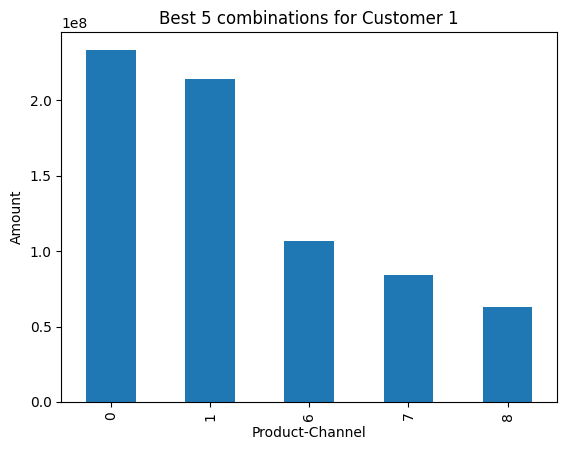

In [63]:
data_real_cust1['AMOUNT'].plot(kind='bar')
plt.xlabel('Product-Channel')
plt.ylabel('Amount')
plt.title('Best 5 combinations for Customer 1')
plt.show()

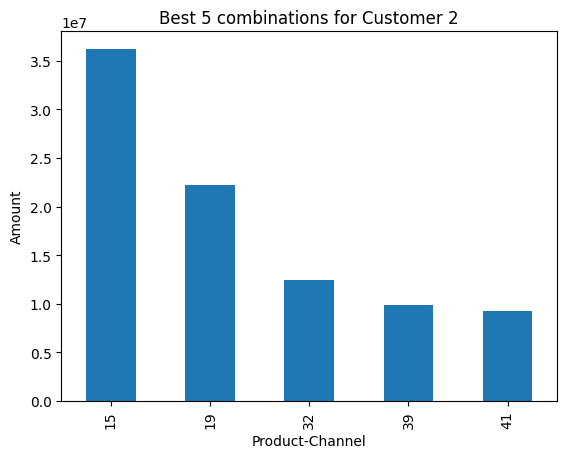

In [64]:
data_real_cust2['AMOUNT'].plot(kind='bar')
plt.xlabel('Product-Channel')
plt.ylabel('Amount')
plt.title('Best 5 combinations for Customer 2')
plt.show()

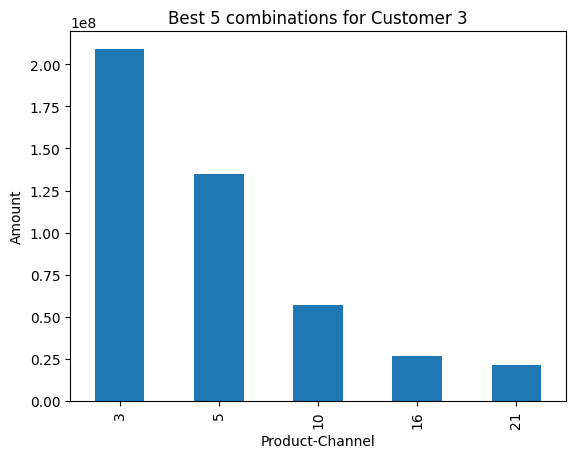

In [65]:
data_real_cust3['AMOUNT'].plot(kind='bar')
plt.xlabel('Product-Channel')
plt.ylabel('Amount')
plt.title('Best 5 combinations for Customer 3')
plt.show()

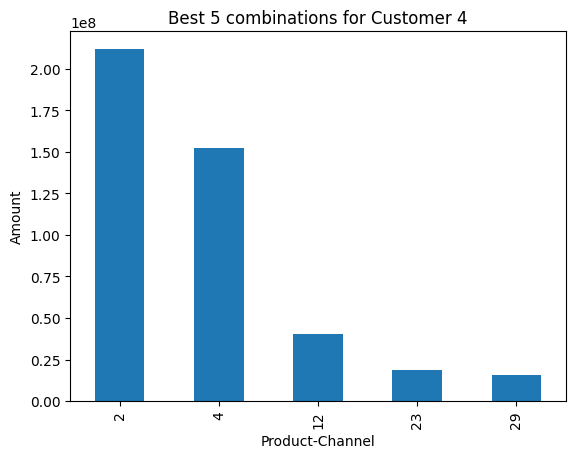

In [66]:
data_real_cust4['AMOUNT'].plot(kind='bar')
plt.xlabel('Product-Channel')
plt.ylabel('Amount')
plt.title('Best 5 combinations for Customer 4')
plt.show()

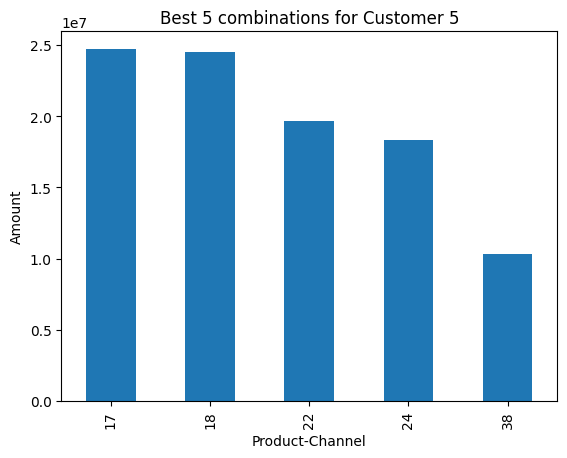

In [67]:
data_real_cust5['AMOUNT'].plot(kind='bar')
plt.xlabel('Product-Channel')
plt.ylabel('Amount')
plt.title('Best 5 combinations for Customer 5')
plt.show()

###Error cuadrático de los canales-productos más grandes de cada customer reales (actuals).